# Identificação de Clientes de Alto Valor

## Planejamento da Solução

### Entrada

O problema de negócio
1. Selecionar os mais valiosos clientes para formar o programa de fidelidade "INSIDERS"
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

### Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade "INSIDERS".
2. Relatório com as respostas para as seguintes perguntas:
- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo ?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento ?

### Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível? O que são clientes de maior valor?
    - Faturamento:
        - Alto Ticket Médio
        - Alto LTV (Life Time Value)
        - Baixo recência
        - Alto basket size (quantidade média de produtos comprados)
        - Baixa probabilidade de Churn
        - Previsão alta de LTV
        - Alta propensão de compra
    - Custo:
        - Baixa taxa de devolução
        
    - Experiência:
        - Alta média de avaliação
2. **Quantos clientes farão parte do grupo?**
     - Número de clientes
     - Porcentagem do total
     
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - Localização
        - Salário
    - Escrever as principais característica de consumo
        - Atributos de Clusterização

4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Faturamento total do ano
    - Faturamento do grupo de Insiders

5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - LTV do grupo Insiders
    - Série temporais (ARMA, ARIMA, HoltWinter, etc)

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Definir a periodicidade (1 mês, 2 meses, 3 meses...)
    - A pessoa precisa de parecido/similiar com outras que já estão no grupo

7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - Definir a periodicidade (1 mês, 2 meses, 3 meses...)
    - A pessoa não ser parecido/similiar com outras que já estão no grupo    

8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste A/B
    - Teste A/B de Bayesiano
    - Teste de hipótese
        
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento ?**
    - Desconto
    - Preferências de escolha
    - Produtos exclusivos

# Imports

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import umap

import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from plotly import express as px

from  yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Loading

In [2]:
data = pd.read_csv('datasets/ecommerce.csv', encoding='unicode_escape')

In [3]:
# drop de coluna
data = data.drop('Unnamed: 8', axis=1)

# 1 Descrição dos Dados

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1 Renomeando as Colunas

In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
old_cols = list(data.columns)

new_cols = []

for c in old_cols:
    new_cols.append(inflection.underscore(c))

data.columns = new_cols

In [7]:
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [8]:
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2 Tamanho do Conjunto de Dados 

In [9]:
print(f'Linhas: {data.shape[0]}')
print(f'Colunas: {data.shape[1]}')

Linhas: 541909
Colunas: 8


## 1.3 Tipos dos Dados

In [10]:
data.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
data.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA's

In [13]:
# drop NA
data = data.dropna()

## 1.6 Troca dos Tipos dos Dados

In [14]:
# invoice_date
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%b-%y')

# customer_id
data['customer_id'] = data['customer_id'].astype('int64')


## 1.7 Estatística Descritiva

# 2 Features Engineering

In [15]:
df2 = data.copy()

In [17]:
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1)
df_ref = df_ref.drop_duplicates().reset_index(drop=True)

# RFM (Recency, Frequency and Monetary  / Recência, Frequência e Monetário)

# Recency - Data de Hoje -(menos) Última data de compra do cliente ( como não faz sentido colocar a data de hoje, faremos
# Última data registrada do DF -(menos) Últidma data de compra do cliente)
df2['recency_days'] = df2['invoice_date'].max() - df2['invoice_date']
df_recency = df2[['customer_id', 'recency_days']].groupby('customer_id').min().reset_index()
df_recency['recency_days'] = df_recency['recency_days'].dt.days     # extrai o dia como int64

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq.columns = ['customer_id', 'frequency']

# Monetary
df2['monetary'] = df2['unit_price']*df2['quantity']
df_monetary = df2[['customer_id', 'monetary']].groupby('customer_id').sum().reset_index()

# AVG Ticket
df_avg_ticket = df2[['customer_id', 'monetary']].groupby('customer_id').mean().reset_index().rename(columns={'monetary': 'avg_ticket'})

In [18]:
# JOINS
df_ref = df_ref.merge(df_monetary, how='left', on='customer_id')
df_ref = df_ref.merge(df_recency, how='left', on='customer_id')
df_ref = df_ref.merge(df_freq, how='left', on='customer_id')
df_ref = df_ref.merge(df_avg_ticket, how='left', on='customer_id')

In [21]:
df_ref.head()

,customer_id,monetary,recency_days,frequency,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


In [23]:
# Check NAs
df_ref.isna().sum()

customer_id     0
monetary        0
recency_days    0
frequency       0
avg_ticket      0
dtype: int64

# 3 Filtragem de Variáveis

# 4 Análise Explooratória dos Dados

# 5 Preparação dos Dados

# 6 Seleção dos Atributos

# 7 Hyperparameter Fine-Tunning

In [32]:
df7 = df_ref.copy()

In [33]:
X = df7.drop('customer_id', axis=1)

In [34]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1 Within-Cluster Sum of Square (WSS)

### 7.1.1 Sem usar a Biblioteca  Yellowbrick

Text(0.5, 1.0, 'WSS vs K')

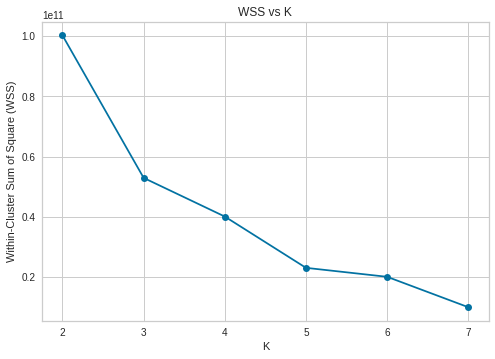

In [35]:
wss = []

for k in clusters:
    # model definition
    kmeans = KMeans(init = 'random', n_clusters=k, n_init=10, max_iter=300, random_state=271)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    
# plot

plt.plot(clusters, wss, linestyle='-', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square (WSS)')
plt.title('WSS vs K')
    

### 7.1.2 Usando a Biblioteca Yellowbrick

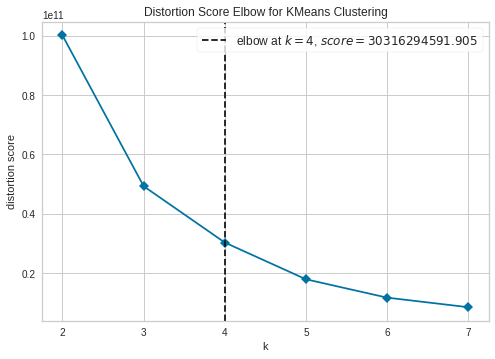

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## 7.2 Silhouette Score

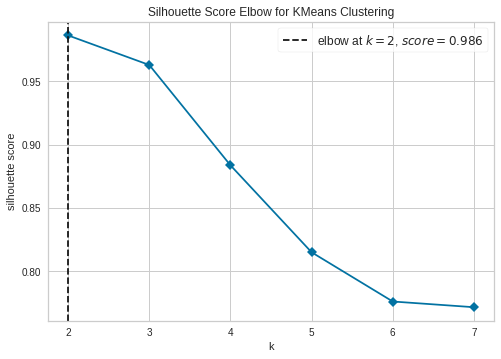

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [38]:
kmeans = KElbowVisualizer(KMeans(), k=clusters, metric = 'silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

### 7.2.1 Análise da Silhueta 

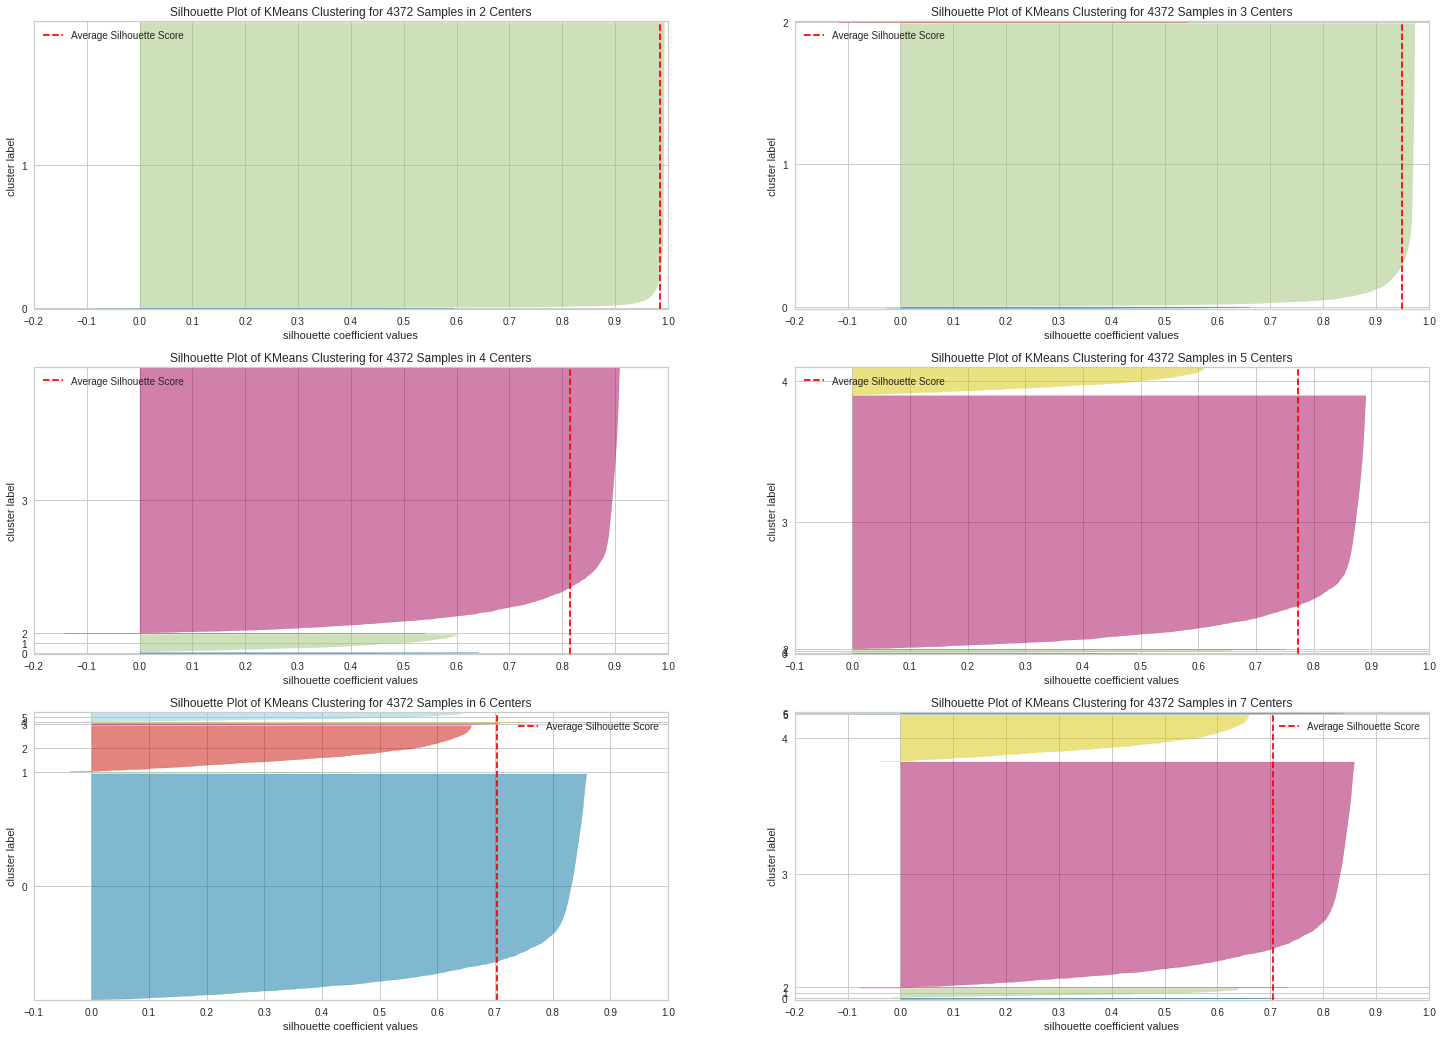

In [64]:

fig, ax = plt.subplots(3, 2, figsize=(25,18))

for k in clusters:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=271)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[k//2 -1][k%2])

    visualizer.fit(X)

    visualizer.finalize()

Analisando os resultados do WSS e da Silhueta vamos seguir para o Treinamento do Modelo com k = 4 (4 clusters).

# 8 Treinamento do Modelo

## 8.1 KMeans

In [67]:
# model definion
k = 4
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=271)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2 Validation

In [68]:
# WSS
print(f'WSS Score: {kmeans.inertia_}')


# Silhouette
s = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {s}')

WSS Score: 40056506734.60243
Silhouette Score: 0.8139972028952444


# 9 Análise dos Clusters

In [69]:
df9 = df7.copy()
df9['clusters'] = labels

In [70]:
df9.head()

,customer_id,monetary,recency_days,frequency,avg_ticket,clusters
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


## 9.1 Inspeção por Visualização

/home/jonas/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


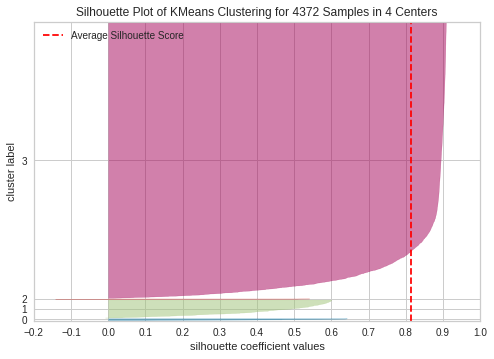

In [74]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)

visualizer.finalize()

## 9.2 2D Plot

In [76]:
df_viz = df9.drop('customer_id', axis=1)

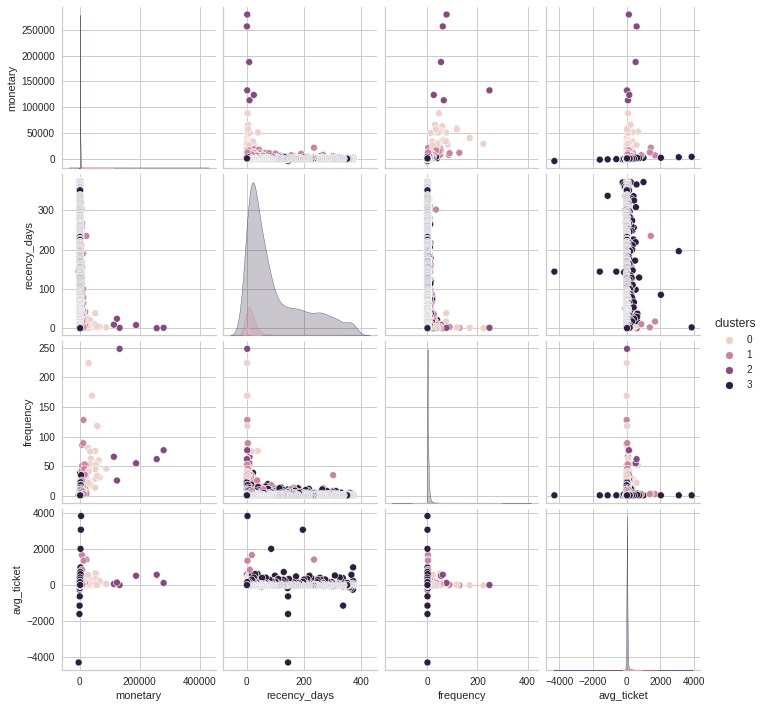

In [78]:
sns.pairplot(df_viz, hue='clusters')

## 9.3 UMAP

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

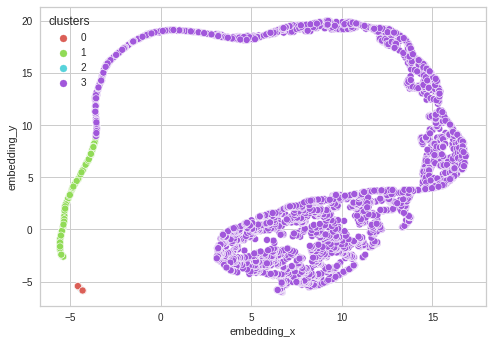

In [96]:
reducer = umap.UMAP(n_neighbors = 20, random_state=42)
embedding = reducer.fit_transform(X)

# embedding
df_viz['embedding_x'] = embedding[: , 0]
df_viz['embedding_y'] = embedding[: , 1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y', 
                hue='clusters', palette=sns.color_palette('hls', n_colors=len(df_viz['clusters'].unique())),
                data=df_viz)

## 9.2 Perfil dos Clusters

In [97]:
df9.head()

,customer_id,monetary,recency_days,frequency,avg_ticket,clusters
0,17850,5288.63,302,35,16.950737,1
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,1
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


In [101]:
# Number of Clusters
df_clusters = df9[['customer_id', 'clusters']].groupby('clusters').count().reset_index()
df_clusters['customer_perc'] = 100*(df_clusters['customer_id'] / df_clusters['customer_id'].sum())

# AVG Monetary
df_avg_monetary = df9[['monetary', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_monetary, on='clusters')
df_clusters['monetary_avg_perc'] = 100*(df_clusters['monetary'] / df_clusters['monetary'].sum())

# AVG Recency_days
df_avg_recency = df9[['recency_days', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_recency, on='clusters')

# AVG Frequency
df_avg_freq = df9[['frequency', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_freq, on='clusters')

# AVG Ticket
df_avg_ticket = df9[['avg_ticket', 'clusters']].groupby('clusters').mean().reset_index()
df_clusters = df_clusters.merge(df_avg_ticket, on='clusters')

# Rename columns
df_clusters.columns = ['clusters', 'num_customer', 'customer_perc', 'monetary_avg', 'monetary_avg_perc', 'recency_days_avg', 'frequency_avg', 'avg_ticket']

In [102]:
df_clusters

,clusters,num_customer,customer_perc,monetary_avg,monetary_avg_perc,recency_days_avg,frequency_avg,avg_ticket
0,0,28,0.640439,42614.387143,18.224353,6.178571,57.821429,162.862605
1,1,267,6.107045,8089.028652,3.459332,20.280899,19.528090,62.783157
2,2,6,0.137237,182181.981667,77.911453,7.166667,89.000000,253.626345
3,3,4071,93.115279,946.696250,0.404862,96.969295,3.641120,25.359654


### **Cluster 01 (Candidatos à Insiders):**
- Número de Clientes: 6 (0.13% dos clientes)
- Receita Média: \$ 182.182,00 (77.9% da receita total)
- Ticket Médio: \$254,00
- Recência Média: 7 dias
- Frequência Média: 89 compras


### **Cluster 02:**
- Número de Clientes: 28 (0.65% dos clientes)
- Receita Média: \$ 42.614,00 (18.22% da receita total)
- Ticket Médio: \$ 163,00
- Recência Média: 6 dias
- Frequência Média: 57 compras

### **Cluster 03:**
- Número de Clientes: 267 (6.1% dos clientes)
- Receita Média: \$ 8.089,00 (3.5% da receita total)
- Ticket Médio: \$ 62,80
- Recência Média: 20 dias
- Frequência Média: 53 compras

### **Cluster 04:**
- Número de Clientes: 4071 (93.1%  dos clientes)
- Receita Média: \$ 946,00 (0.4% da receita total)
- Ticket Médio: \$ 25,00
- Recência Média: 96 dias
- Frequência Média: 4 compras


# 10 Deploy do Modelo em Produção